In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import nan

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import Sequential

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
data = pd.read_csv('/content/household_power_consumption.txt', sep=';',parse_dates=True,low_memory=False)

In [5]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0
2075258,26/11/2010,21:02:00,0.932,0.000,239.550,3.800,0.000,0.000,0.0


In [6]:
#concatenate Date and Time columns together
data['date_time'] = data['Date'].str.cat(data['Time'],sep=' ')
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [7]:
data.drop(['Date', 'Time'],axis=1,inplace=True)
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
2075254,0.946,0.000,240.430,4.000,0.000,0.000,0.0,26/11/2010 20:58:00
2075255,0.944,0.000,240.000,4.000,0.000,0.000,0.0,26/11/2010 20:59:00
2075256,0.938,0.000,239.820,3.800,0.000,0.000,0.0,26/11/2010 21:00:00
2075257,0.934,0.000,239.700,3.800,0.000,0.000,0.0,26/11/2010 21:01:00
2075258,0.932,0.000,239.550,3.800,0.000,0.000,0.0,26/11/2010 21:02:00


In [8]:
data.set_index('date_time',inplace=True)
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
26/11/2010 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
26/11/2010 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
26/11/2010 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
26/11/2010 21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0
26/11/2010 21:02:00,0.932,0.000,239.550,3.800,0.000,0.000,0.0


In [9]:
data.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [10]:
data.replace('?', nan, inplace=True)

In [11]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [12]:
data = data.astype('float')

In [13]:
np.isnan(data).sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [14]:
# Replace the nan with same value as in the same date of previous day
def fill_missing(data):
  one_day = 24*60
  for row in range (data.shape[0]):
    for col in range(data.shape[1]):
      if np.isnan(data[row,col]):
        data[row,col] = data[row - one_day, col]

In [15]:
fill_missing(data.values)

In [16]:
data.values

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]])

In [17]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 16/12/2006 17:24:00 to 26/11/2010 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7+ MB


In [19]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.089418e+00,1.236871e-01,2.408364e+02,4.618401e+00,1.118474e+00,1.291131e+00,6.448635e+00
std,1.054678e+00,1.125933e-01,3.240051e+00,4.433165e+00,6.141460e+00,5.796922e+00,8.433584e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.526000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [20]:
data.shape

(2075259, 7)

In [21]:
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
26/11/2010 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
26/11/2010 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
26/11/2010 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
26/11/2010 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
26/11/2010 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [22]:
data.to_csv('cleaned_data.csv')

In [23]:
# Sum data for a whole day as you need to predict data per day instead of minutes
dataset = pd.read_csv('/content/cleaned_data.csv', parse_dates=True,index_col='date_time', low_memory=False)

In [24]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [25]:
dataset.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [26]:
data = dataset.resample('D').sum() # sums data on a day basis i.e adds all the data together for each day

In [27]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


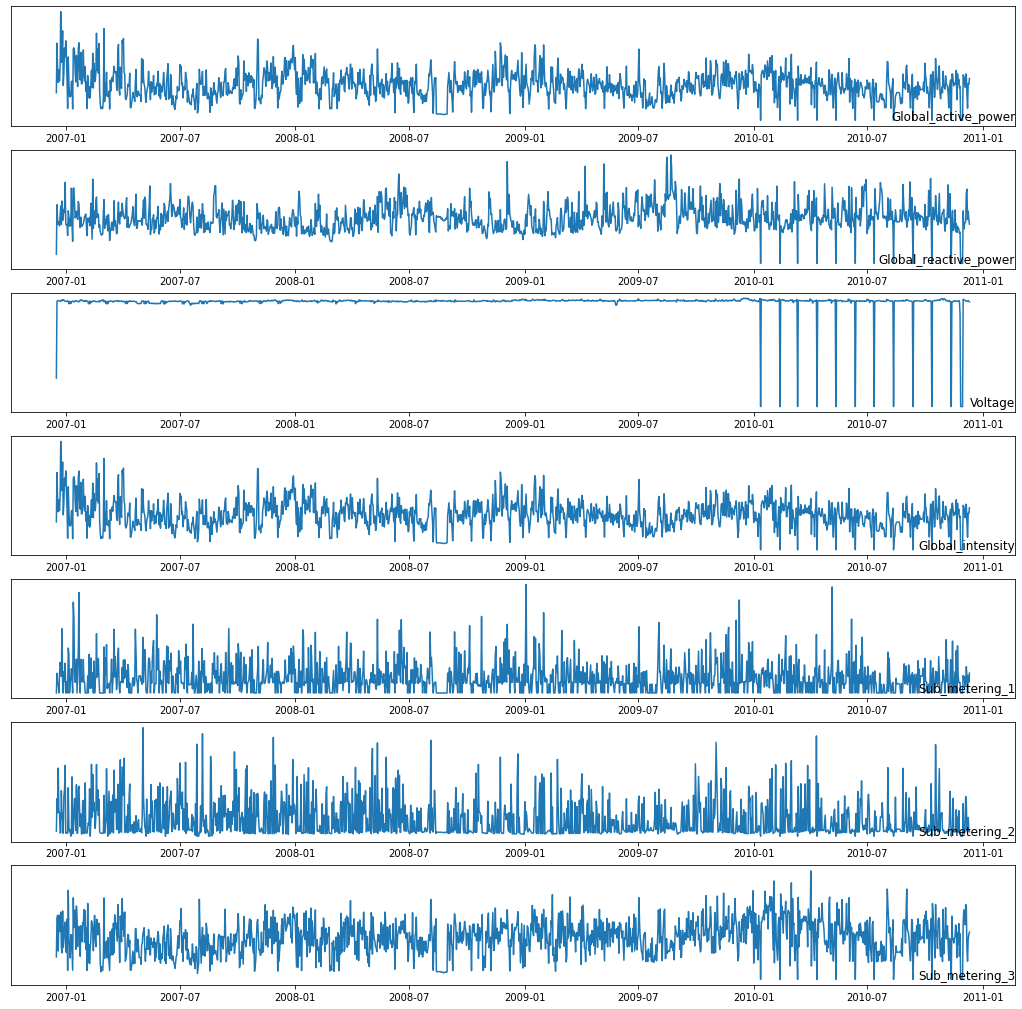

In [28]:
fig, ax = plt.subplots(figsize=(18,18))
for i in range(len(data.columns)):
  plt.subplot(len(data.columns),1,i+1) # determine #of subplots ie. 7 rows, 1 column and # of plots
  name = data.columns[i]
  plt.plot(data[name])
  plt.title(name, y =0, loc='right')
  plt.yticks([])
plt.show()
fig.tight_layout()

Exploring Active power consumption for each year

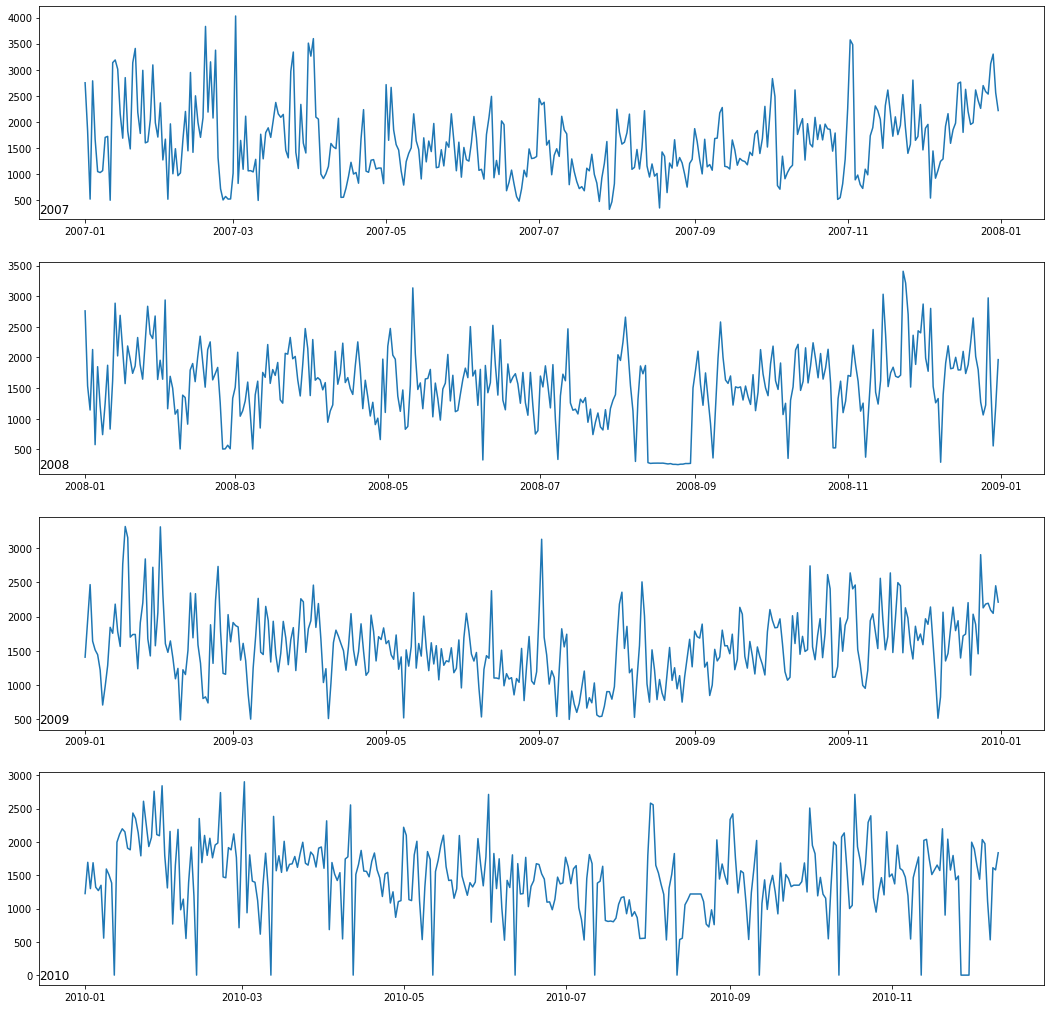

In [29]:
years = ['2007', '2008', '2009', '2010']
fig, ax = plt.subplots(figsize=(18,18))
for i in range(len(years)):
  ax = plt.subplot(len(years), 1, i+1)
  year = years[i]
  active_power_data = data[str(year)]
  plt.plot(active_power_data['Global_active_power'])
  plt.title(str(year), y=0, loc='left')
plt.show()
fig.tight_layout()

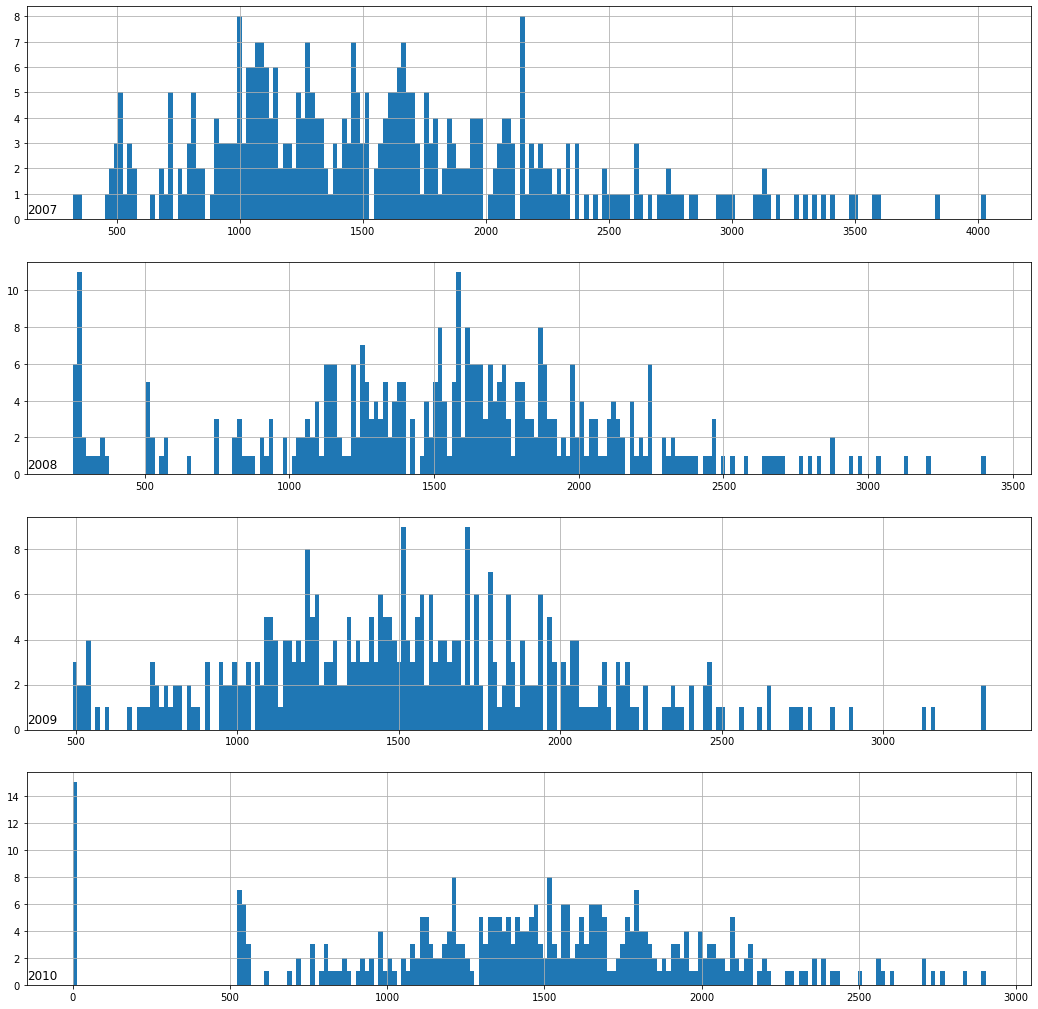

In [30]:
years = ['2007', '2008', '2009', '2010']
fig, ax = plt.subplots(figsize=(18,18))
for i in range(len(years)):
  ax = plt.subplot(len(years), 1, i+1)
  year = years[i]
  active_power_data = data[str(year)]
  active_power_data['Global_active_power'].hist(bins=200)
  plt.title(str(year), y=0, loc='left')
plt.show()
fig.tight_layout()

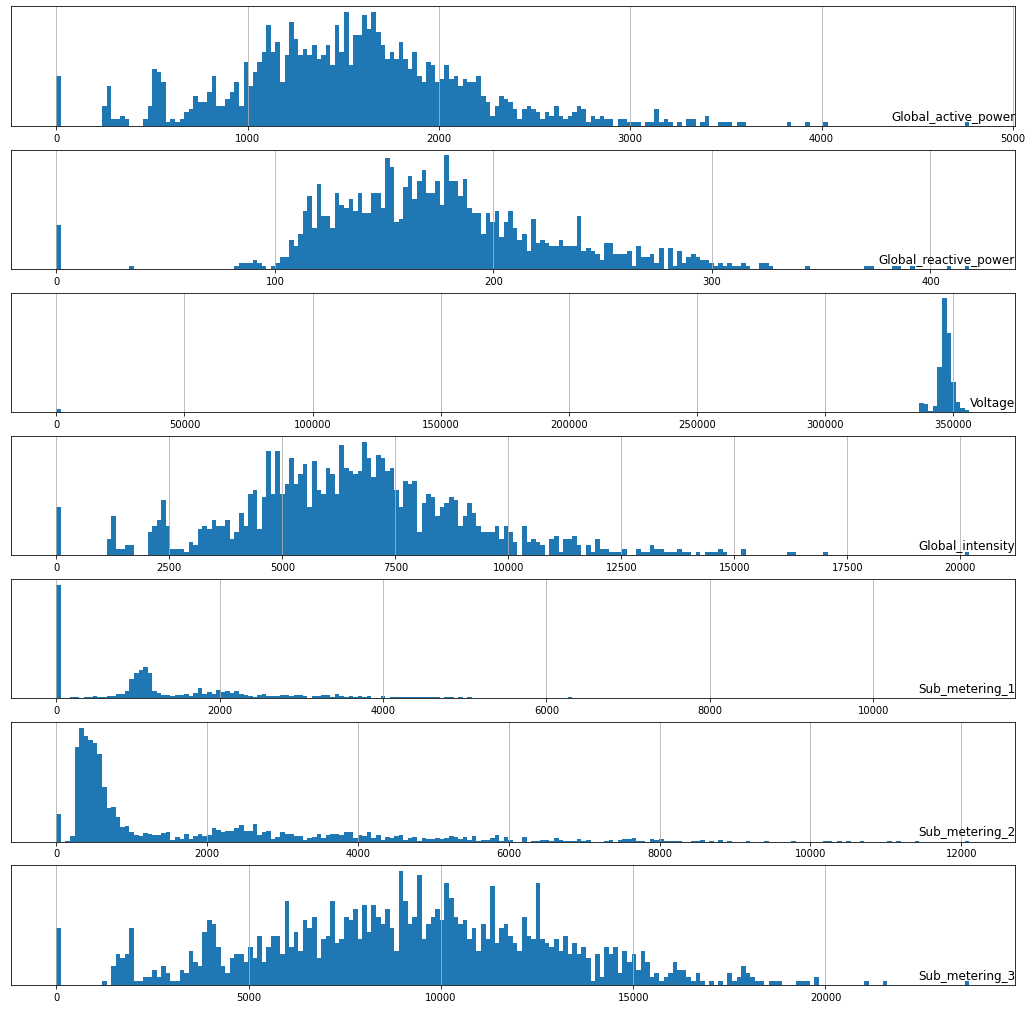

In [31]:
fig, ax = plt.subplots(figsize=(18,18))
for i in range(len(data.columns)):
  plt.subplot(len(data.columns),1,i+1) # determine #of subplots ie. 7 rows, 1 column and # of plots
  name = data.columns[i]
  data[name].hist(bins=200)
  plt.title(name, y =0, loc='right')
  plt.yticks([])
plt.show()
fig.tight_layout()

Plot power consumption for each month of 2007

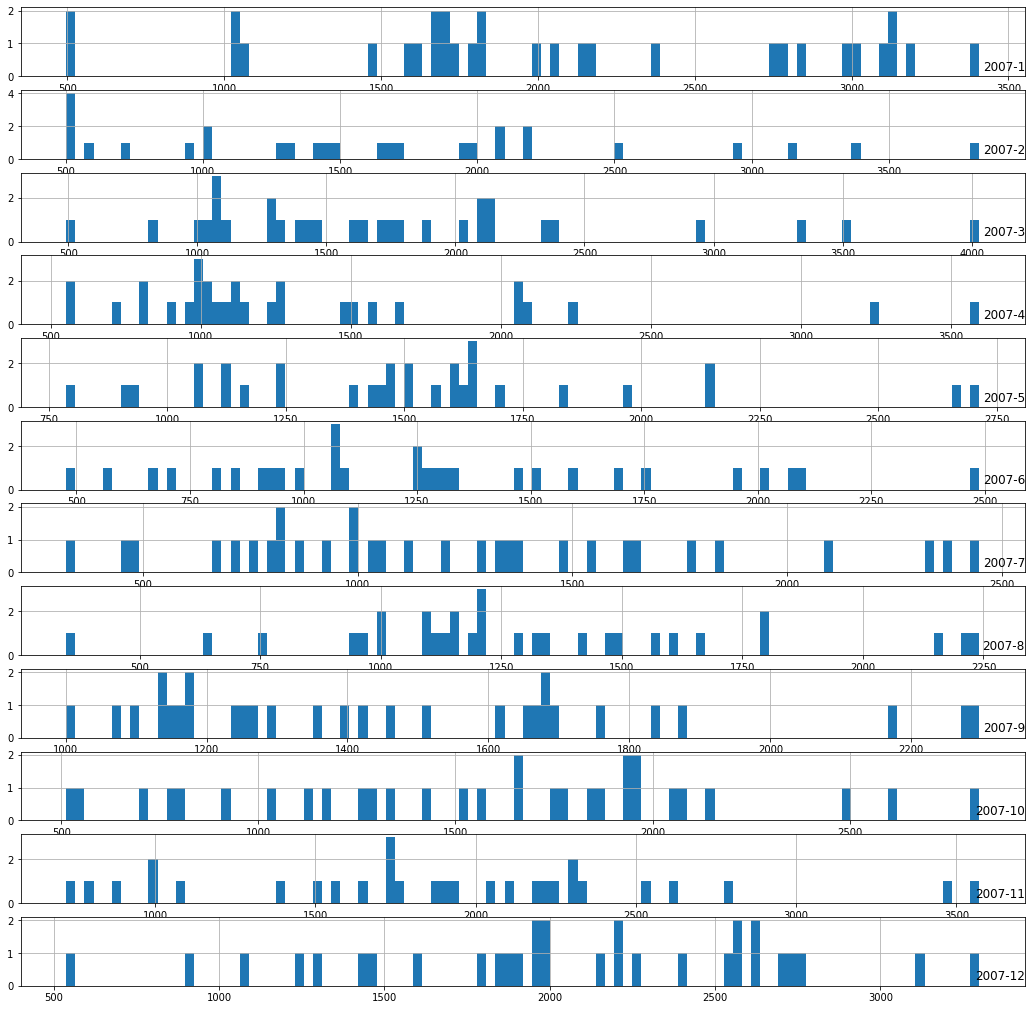

In [45]:
months = [i for i in range(1,13)]

fig, ax = plt.subplots(figsize=(18,18))
for i in range(len(months)):
  ax = plt.subplot(len(months),1,i+1)
  month = '2007-' + str(months[i])
  #print(month)
  active_power_data = data[month]
  active_power_data['Global_active_power'].hist(bins = 100)
  #ax.set_xlim(0,50)
  plt.title(month, y=0, loc='right')
plt.show()
fig.tight_layout()

In [47]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [48]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,1551.697967,176.172177,343032.233082,6578.159643,1593.084420,1839.005491,9185.029513
std,614.949776,51.844721,35759.251700,2549.274088,1581.929433,2082.860776,3774.129939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1162.226000,141.914000,345672.700000,5005.000000,582.000000,429.000000,6605.000000
50%,1534.652000,170.396000,346958.950000,6508.000000,1111.000000,683.000000,9230.000000
75%,1890.472000,202.392000,348264.250000,7953.400000,2196.000000,2711.000000,11716.000000
max,4773.386000,417.834000,356306.410000,20200.400000,11178.000000,12109.000000,23743.000000


In [49]:
data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2010-12-07,1109.574,285.912,345914.85,4892.0,1724.0,646.0,6444.0
2010-12-08,529.698,169.098,346744.70,2338.2,0.0,514.0,3982.0
2010-12-09,1612.092,201.358,347932.40,6848.2,1805.0,2080.0,8891.0
2010-12-10,1579.692,170.268,345975.37,6741.2,1104.0,780.0,9812.0
2010-12-11,1836.822,151.144,343926.57,7826.2,2054.0,489.0,10308.0


In [52]:
data_train = data.loc[:'2009-12-31',:]['Global_active_power']
data_train

date_time
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
                ...   
2009-12-27    2195.452
2009-12-28    2094.098
2009-12-29    2047.968
2009-12-30    2451.110
2009-12-31    2211.892
Freq: D, Name: Global_active_power, Length: 1112, dtype: float64

In [53]:
data_test = data['2010']['Global_active_power']
data_test

date_time
2010-01-01    1224.252
2010-01-02    1693.778
2010-01-03    1298.728
2010-01-04    1687.440
2010-01-05    1320.158
                ...   
2010-12-07    1109.574
2010-12-08     529.698
2010-12-09    1612.092
2010-12-10    1579.692
2010-12-11    1836.822
Freq: D, Name: Global_active_power, Length: 345, dtype: float64

In [54]:
data_train.shape, data_test.shape

((1112,), (345,))

In [55]:
data_train = np.array(data_train)

In [56]:
x_train, y_train = [], []
for i in range(7, len(data_train)-7):
  x_train.append(data_train[i-7:i])
  y_train.append(data_train[i:i+7])

In [57]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [58]:
x_train.shape, y_train.shape

((1098, 7), (1098, 7))

In [60]:
pd.DataFrame(y_train)

,0,1,2,3,4,5,6
0,4773.386,2550.012,2743.120,3934.110,1528.760,2072.638,3174.392
1,2550.012,2743.120,3934.110,1528.760,2072.638,3174.392,2796.108
2,2743.120,3934.110,1528.760,2072.638,3174.392,2796.108,3494.196
3,3934.110,1528.760,2072.638,3174.392,2796.108,3494.196,2749.004
4,1528.760,2072.638,3174.392,2796.108,3494.196,2749.004,1824.760
...,...,...,...,...,...,...,...
1093,1144.166,2034.966,1888.022,1455.200,2905.894,2127.648,2183.618
1094,2034.966,1888.022,1455.200,2905.894,2127.648,2183.618,2195.452
1095,1888.022,1455.200,2905.894,2127.648,2183.618,2195.452,2094.098
1096,1455.200,2905.894,2127.648,2183.618,2195.452,2094.098,2047.968


In [61]:
x_scaler = MinMaxScaler()
x_train = x_scaler.fit_transform(x_train)

In [64]:
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)

In [65]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

In [66]:
x_train.shape

(1098, 7, 1)

In [67]:
reg = Sequential()
reg.add(LSTM(units=200,input_shape=(7,1),activation='relu')) # 7 time steps and number of features which is the input shape
reg.add(Dense(7)) # Multi step prediction of predicting 7 days in future and hence 7 units

In [68]:
reg.compile(optimizer='Adam', loss='mse')

In [69]:
reg.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
35/35 [==============================] - 2s 18ms/step - loss: 0.0616
Epoch 2/100
35/35 [==============================] - 1s 18ms/step - loss: 0.0247
Epoch 3/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0241
Epoch 4/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0241
Epoch 5/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0241
Epoch 6/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0241
Epoch 7/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0240
Epoch 8/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0239
Epoch 9/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0239
Epoch 10/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0237
Epoch 11/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0239
Epoch 12/100
35/35 [==============================] - 1s 17ms/step - loss: 0.0239
Epoch 13/100
35/35 [=====

In [71]:
  data_test = np.array(data_test)

In [72]:
x_test, y_test = [], []
for i in range(7, len(data_test)-7):
  x_test.append(data_test[i-7:i])
  y_test.append(data_test[i:i+7])

In [73]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [74]:
x_test.shape, y_test.shape

((331, 7), (331, 7))

In [75]:
x_test = x_scaler.transform(x_test)
y_test = y_scaler.transform(y_test)

In [76]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [77]:
x_test.shape

(331, 7, 1)

In [78]:
y_pred = reg.predict(x_test)

In [79]:
y_pred

array([[0.27620682, 0.3315027 , 0.3441839 , ..., 0.32409537, 0.3216039 ,
        0.31907326],
       [0.20082322, 0.2766251 , 0.30394077, ..., 0.30998978, 0.30751577,
        0.30251214],
       [0.27474988, 0.3266406 , 0.34254372, ..., 0.31354854, 0.30665678,
        0.307518  ],
       ...,
       [0.24341278, 0.22410324, 0.21153675, ..., 0.16586378, 0.17667526,
        0.16846704],
       [0.3044326 , 0.3102155 , 0.2735374 , ..., 0.22136341, 0.21282434,
        0.2075642 ],
       [0.30232954, 0.31384704, 0.28388375, ..., 0.23702219, 0.23580179,
        0.24887607]], dtype=float32)

In [80]:
y_pred = y_scaler.inverse_transform(y_pred)
y_true = y_scaler.inverse_transform(y_test)

In [81]:
def evaluate_model(y_true, y_predicted):
  scores =[]
  #calculate score for each day
  for i in range(y_true.shape[1]):
    mse = mean_squared_error(y_true[:,i],y_predicted[:,i])
    rmse = np.sqrt(mse)
    scores.append(rmse)
  
  #calculate score for whole prediction
  total_score = 0
  for row in range(y_true.shape[0]):
    for col in range(y_predicted.shape[1]):
      total_score = total_score + (y_true[row, col] - y_predicted[row, col]) ** 2
  total_score = np.sqrt(total_score/(y_true.shape[0] * y_predicted.shape[1]))

  return total_score, scores

In [92]:
evaluate_model(y_true,y_pred)

(575.436532212897,
 [574.0160051608399,
  586.1057056283584,
  582.4838421579545,
  570.0838052708184,
  576.5428445857056,
  570.117877612425,
  568.4691095055884])

In [93]:
np.std(y_true[0]) # first column standard deviation is 710. Hence our model error is less than std deviation and hence is good.

710.0253857243853